In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import regularizers
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "Dimensions of Train data:", x_train.shape
print "Dimensions of Train label:", y_train.shape
print "Dimensions of Test data:", x_test.shape
print "Dimensions of Test label:", y_test.shape

Dimensions of Train data: (60000, 28, 28)
Dimensions of Train label: (60000,)
Dimensions of Test data: (10000, 28, 28)
Dimensions of Test label: (10000,)


In [3]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

print "Dimensions of Train data:", x_train.shape
print "Dimensions of in Test data:", x_test.shape
print "Dimensions of Train label:", y_train.shape
print "Dimensions of Test label:", y_test.shape

Dimensions of Train data: (60000, 784)
Dimensions of in Test data: (10000, 784)
Dimensions of Train label: (60000, 10)
Dimensions of Test label: (10000, 10)


In [4]:
model = Sequential()
model.add(Dense(28*28, activation = 'relu', use_bias = True, bias_initializer = 'zeros', input_shape = (28*28,), kernel_regularizer=regularizers.l2(0.01)))
keras.layers.Dropout(0.05)
model.add(Dense(10, use_bias = True, bias_initializer = 'zeros', activation = 'softmax'))

In [5]:
ada = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(optimizer = ada, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, verbose = 1, validation_split = 0.2, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 72s 2ms/step - loss: 0.6187 - acc: 0.9051 - val_loss: 0.4084 - val_acc: 0.9322
Epoch 2/50
48000/48000 [==============================] - 100s 2ms/step - loss: 0.3900 - acc: 0.9324 - val_loss: 0.3531 - val_acc: 0.9425
Epoch 3/50
48000/48000 [==============================] - 87s 2ms/step - loss: 0.3492 - acc: 0.9401 - val_loss: 0.3272 - val_acc: 0.9460
Epoch 4/50
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3230 - acc: 0.9451 - val_loss: 0.2957 - val_acc: 0.9517
Epoch 5/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.3041 - acc: 0.9487 - val_loss: 0.2875 - val_acc: 0.9522
Epoch 6/50
48000/48000 [==============================] - 89s 2ms/step - loss: 0.2906 - acc: 0.9514 - val_loss: 0.2778 - val_acc: 0.9548
Epoch 7/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2800 - acc: 0.9536 - val_loss: 0.2740 - val_ac

In [7]:
print "Test Accuracy:",history.history['acc'][-1]*100,"%"
print "Validation Accuracy:",history.history['val_acc'][-1] * 100,"%"

Test Accuracy: 97.55208333333333 %
Validation Accuracy: 97.13333333333334 %


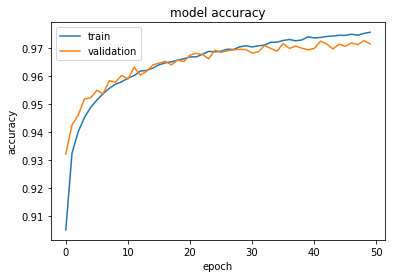

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

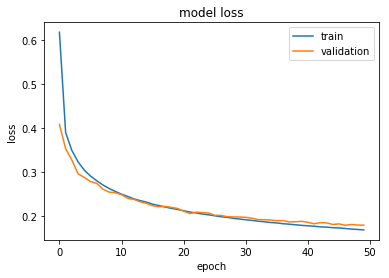

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [11]:
eval = model.evaluate(x_test, y_test, verbose = 0)
print "Test Accuracy:", eval[1]*100,"%"


Test Accuracy: 97.07000000000001 %
